In [6]:
%%time
# This is the important part
import psi4

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [7]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

*** tstart() called on cs007.hpc.nyu.edu
*** at Tue Nov 15 14:26:17 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                

-76.0266327350902

In [9]:
%%time
# Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')


Scratch directory: /tmp/

*** tstart() called on cs007.hpc.nyu.edu
*** at Tue Nov 15 14:26:43 2022

   => Loading Basis Set <=

    Name: 6-31G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   115 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 
    atoms 2-3 entry H          line    44 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              UHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 3:

       Center              X                  Y                   Z               Mass       
    ------------

-38.92533462893707

In [10]:
%%time
# Optimize Hartree-Fock calculation of water molecule
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs007.hpc.nyu.edu
*** at Tue Nov 15 14:26:54 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y        

-76.02703272937481

In [11]:
%%time
# Compute harmonic vibrational frequency of water molecule
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs007.hpc.nyu.edu
*** at Tue Nov 15 14:27:14 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge =

In [13]:
%%time
# Analysis of intermolecular interactions
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

# Computation options of ethene*ethyne
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)


Scratch directory: /tmp/
  SAPT does not make use of molecular symmetry, further calculations in C1 point group.
   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //              Dimer HF             //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on cs007.hpc.nyu.edu
*** at Tue Nov 15 14:30:04 2022

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    

-0.0022355823909805178

In [14]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [32]:
%%time
#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
0 1
Ar
--
Ar 1 {0}
symmetry c1
"""

Rvals = np.arange(3.5,6.1,0.1)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

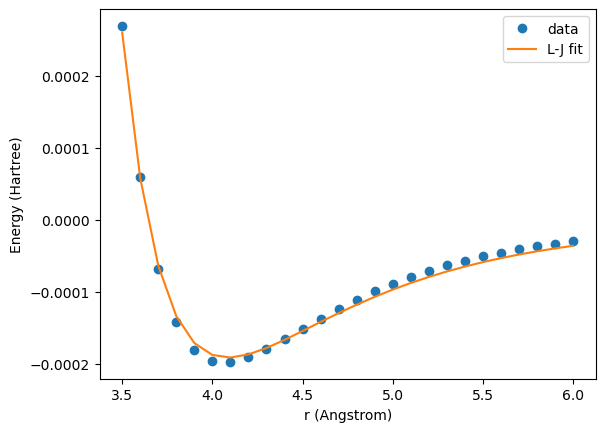

In [34]:
# define lennard jones potential
def lj(r, eps, sig):
    return 4*eps*((sig/r)**12 - (sig/r)**6)

# convert dictionary to numpy array
energy = np.array(list(ecp.values()))

# fit curve to data
popt, pcov = curve_fit(lj, r, energy)

# plot data and fit
plt.plot(r, energy, 'o', label='data')
plt.plot(r, lj(r, *popt), label='L-J fit')
plt.xlabel('r (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.legend()
plt.show()

